# Comparison of Numerical Integration Methods

numerically integrate the exact function between [-1, 1]

/var/folders/7h/m_gp7w0x1955xv6xvcndpkf40000gn/T/ipykernel_8675/2783921993.py:18: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  simpson_result = simps(y_even, x_even)


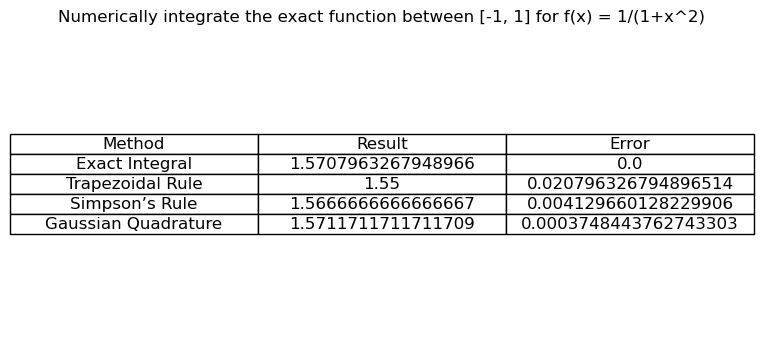

In [3]:
import numpy as np
from scipy.integrate import quad, simps, trapezoid, fixed_quad
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    return 1 / (1 + x**2)

a, b = -1, 1

exact_integral, _ = quad(f, a, b)

x_even = np.linspace(a, b, 5) # 5 data points only
y_even = f(x_even)

trapz_result = trapezoid(y_even, x_even)

simpson_result = simps(y_even, x_even)

gauss_result, _ = fixed_quad(f, a, b, n=5) # Gaussian Quadrature (using 5-point rule)

trapz_error = abs(exact_integral - trapz_result)
simpson_error = abs(exact_integral - simpson_result)
gauss_error = abs(exact_integral - gauss_result)

data = {
    'Method': ['Exact Integral', 'Trapezoidal Rule', 'Simpson’s Rule', 'Gaussian Quadrature'],
    'Result': [exact_integral, trapz_result, simpson_result, gauss_result],
    'Error': [0, trapz_error, simpson_error, gauss_error]
}

results_table = pd.DataFrame(data)

#plot the result table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=results_table.values, colLabels=results_table.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title("Numerically integrate the exact function between [-1, 1] for f(x) = 1/(1+x^2)")
plt.show()

approximate intergral of a smooth function interpolated on unevenly spaced data points between [-1, 1] 

/var/folders/7h/m_gp7w0x1955xv6xvcndpkf40000gn/T/ipykernel_6779/2857416317.py:24: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  simpson_result = simps(y_even, x_even)


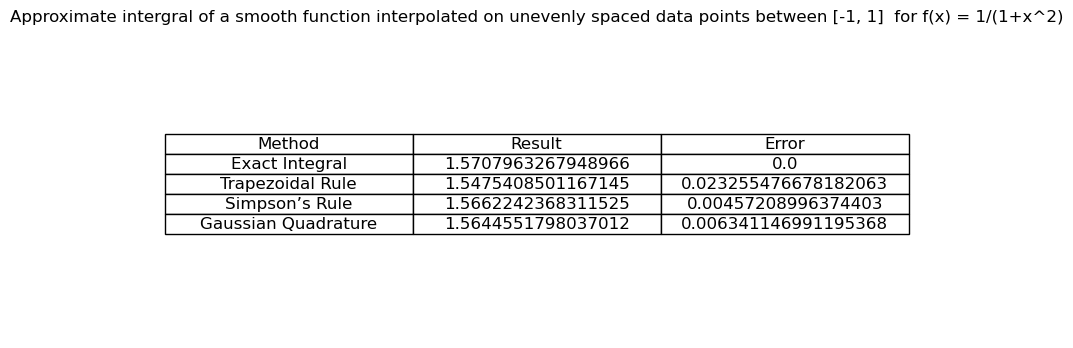

In [7]:
import numpy as np
from scipy.integrate import quad, simps, trapezoid, fixed_quad
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def f(x):
    return 1 / (1 + x**2)

a, b = -1, 1

exact_integral, _ = quad(f, a, b)

x_uneven = np.array([-1.0, -0.3, -0.2, 0.3, 1.0])
y_uneven = f(x_uneven)

spline = CubicSpline(x_uneven, y_uneven)

x_even = np.linspace(a, b, 5) # 5 data points only
y_even = spline(x_even)

trapz_result = trapezoid(y_even, x_even)

simpson_result = simps(y_even, x_even)

gauss_result, _ = fixed_quad(spline, a, b, n=5) # Gaussian Quadrature (using 5-point rule)

trapz_error = abs(exact_integral - trapz_result)
simpson_error = abs(exact_integral - simpson_result)
gauss_error = abs(exact_integral - gauss_result)

data = {
    'Method': ['Exact Integral', 'Trapezoidal Rule', 'Simpson’s Rule', 'Gaussian Quadrature'],
    'Result': [exact_integral, trapz_result, simpson_result, gauss_result],
    'Error': [0, trapz_error, simpson_error, gauss_error]
}

results_table = pd.DataFrame(data)

#plot the result table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=results_table.values, colLabels=results_table.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title("Approximate intergral of a smooth function interpolated on unevenly spaced data points between [-1, 1]  for f(x) = 1/(1+x^2)")
plt.show()

numerically integrate the unevenly spaced data points direclty 

/var/folders/7h/m_gp7w0x1955xv6xvcndpkf40000gn/T/ipykernel_6779/379195254.py:21: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  simpson_result_uneven = simps(y_uneven, x_uneven)


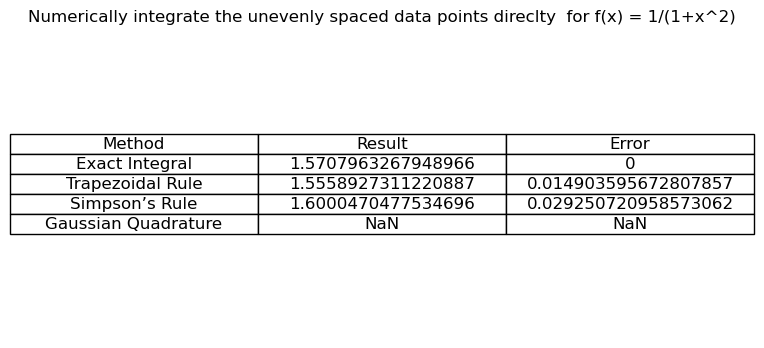

In [9]:
import numpy as np
from scipy.integrate import quad, simps, trapezoid, fixed_quad
from scipy.interpolate import CubicSpline
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    return 1 / (1 + x**2)

a, b = -1, 1

exact_integral, _ = quad(f, a, b)

x_uneven = np.array([-1.0, -0.3, -0.2, 0.3, 1.0])
y_uneven = f(x_uneven)

trapz_result_uneven = trapezoid(y_uneven, x_uneven)

# Simpson's Rule
try:
    simpson_result_uneven = simps(y_uneven, x_uneven)
except ValueError as e:
    simpson_result_uneven = f"Simpson's Rule requires evenly spaced data: {e}"

# Gaussian Quadrature cannot directly apply to discrete data points.
gauss_result_uneven = "Gaussian Quadrature is not applicable directly to discrete points."

trapz_error = abs(exact_integral - trapz_result_uneven)
simpson_error = abs(exact_integral - simpson_result_uneven)
gauss_result = "NaN"
gauss_error = "NaN"

data = {
    'Method': ['Exact Integral', 'Trapezoidal Rule', 'Simpson’s Rule', 'Gaussian Quadrature'],
    'Result': [exact_integral, trapz_result_uneven, simpson_result_uneven, gauss_result],
    'Error': [0, trapz_error, simpson_error, gauss_error]
}

results_table = pd.DataFrame(data)

#plot the result table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')
table = ax.table(cellText=results_table.values, colLabels=results_table.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title("Numerically integrate the unevenly spaced data points direclty  for f(x) = 1/(1+x^2)")
plt.show()

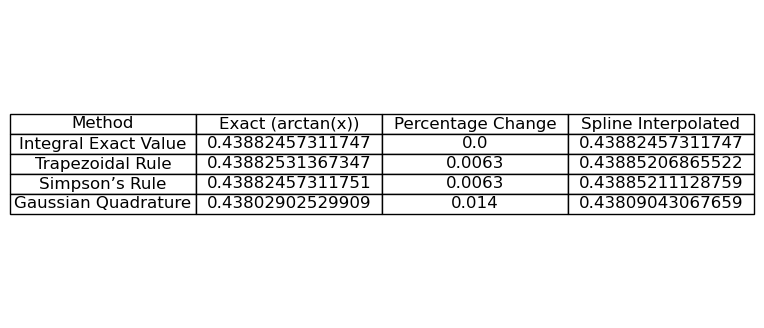

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Results data
data = {
    'Method': ['Integral Exact Value', 'Trapezoidal Rule', 'Simpson’s Rule', 'Gaussian Quadrature'],
    'Exact (arctan(x))': [0.43882457311747, 0.43882531367347, 0.43882457311751, 0.43802902529909],  # Exact value of integral of arctan(x) from 0 to 1
    'Percentage Change': [0, 0.0063, 0.0063, 0.014],
    'Spline Interpolated': [0.43882457311747, 0.43885206865522, 0.43885211128759, 0.43809043067659]
}

# Create DataFrame
results_table = pd.DataFrame(data)

# Plotting the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed
ax.axis('off')  # Hide the axes

# Plot the table
table = ax.table(cellText=results_table.values, colLabels=results_table.columns, loc='center', cellLoc='center')

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table for better readability

# Display the plot
plt.show()

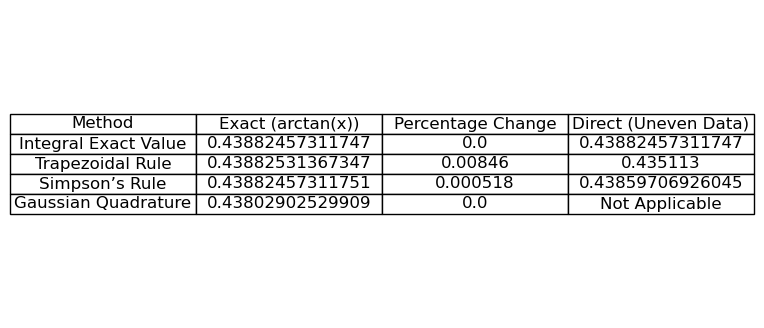

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Results data
data = {
    'Method': ['Integral Exact Value', 'Trapezoidal Rule', 'Simpson’s Rule', 'Gaussian Quadrature'],
    'Exact (arctan(x))': [0.43882457311747, 0.43882531367347, 0.43882457311751, 0.43802902529909],  # Exact value of integral of arctan(x) from 0 to 1
    'Percentage Change': [0, 0.00846, 0.000518, 0],
    'Direct (Uneven Data)': [0.43882457311747, 0.4351130000000, 0.43859706926045, 'Not Applicable']
}

# Create DataFrame
results_table = pd.DataFrame(data)

# Plotting the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust the size as needed
ax.axis('off')  # Hide the axes

# Plot the table
table = ax.table(cellText=results_table.values, colLabels=results_table.columns, loc='center', cellLoc='center')

# Style the table (optional)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Scale the table for better readability

# Display the plot
plt.show()